AIM 1: Perform Regression

1. Load the titanic dataset
2. Handle missing values, if any
3. Check for linearity between 'Age' and 'Fare'
    3.1. If it's linear, perform Regression and visualize it
    3.2. If it's not linear, still perform Regression and visualize it. What do you make of the result?
    3.3. Plot the residuals to see if it's normally distributed. Residual can be plotted as scatter plot between the predicted Y value and residuals is the actual Y values and the predicted values. Predicted values is (intercept + slope * X)
4. Load the penguins dataset
5. Handle missing values, if any
6. Check for linearity between 'bill_length_mm' and 'body_mass_g', and repeat the same process as you did in Step 3
7. Try out different variables from the penguins dataset to perform regression

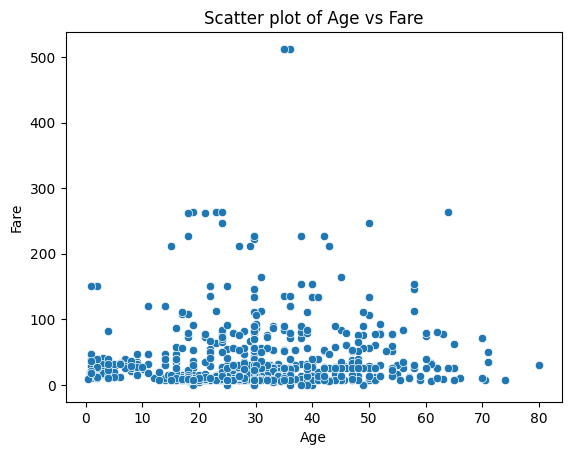

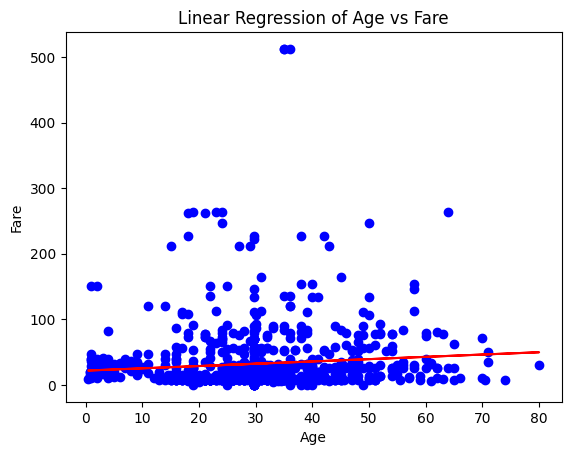

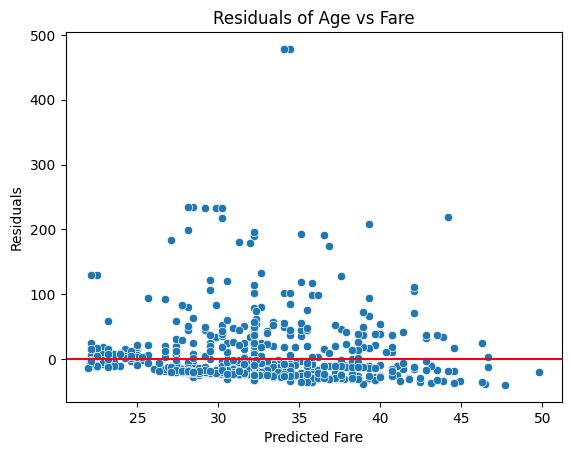

Skewness of residuals: 4.785367422167945
Kurtosis of residuals: 33.31017548615114


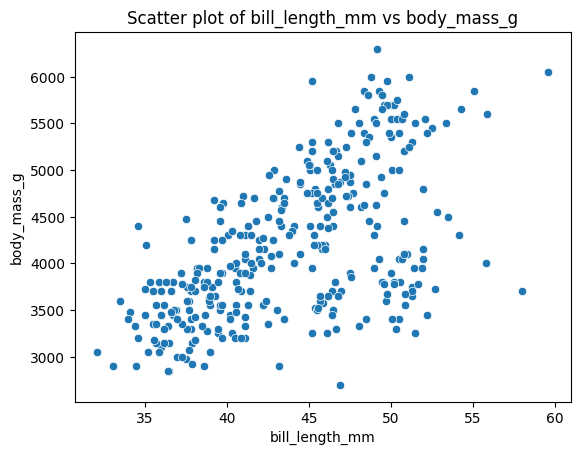

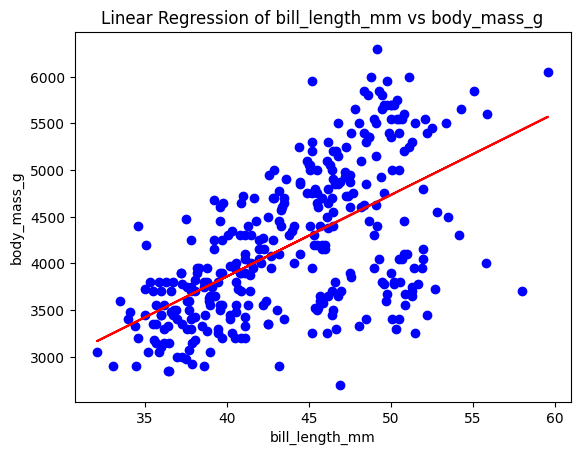

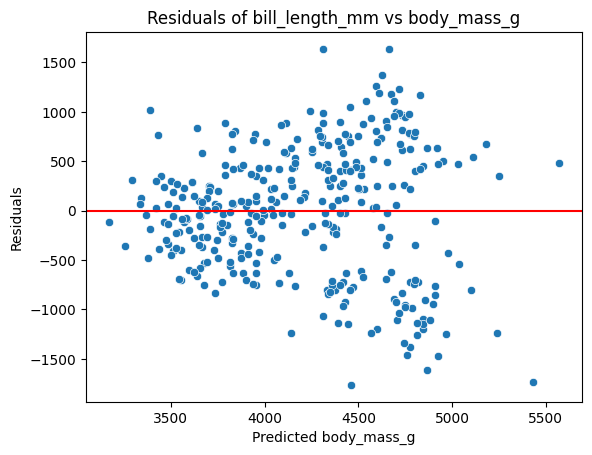

Skewness of residuals: -0.21130630396489505
Kurtosis of residuals: -0.40276844144736224


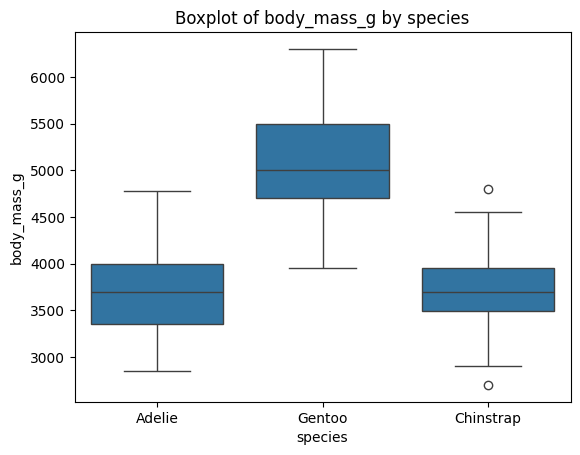

Linear Regression for Adelie: Intercept = 34.88298865371735, Coefficient = 94.4998154013297
Linear Regression for Gentoo: Intercept = -123.82793265390137, Coefficient = 109.45916306693877
Linear Regression for Chinstrap: Intercept = 846.1433268631499, Coefficient = 59.117732337551054


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

titanic = pd.read_csv('titanic.csv')

titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Fare'].fillna(titanic['Fare'].mean(), inplace=True)

sns.scatterplot(data=titanic, x='Age', y='Fare')
plt.title("Scatter plot of Age vs Fare")
plt.show()

X = titanic[['Age']]
y = titanic['Fare']
reg = LinearRegression().fit(X, y)

plt.scatter(X, y, color='blue')
plt.plot(X, reg.predict(X), color='red')
plt.title("Linear Regression of Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

residuals = y - reg.predict(X)
sns.scatterplot(x=reg.predict(X), y=residuals)
plt.title("Residuals of Age vs Fare")
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

print("Skewness of residuals:", stats.skew(residuals))
print("Kurtosis of residuals:", stats.kurtosis(residuals))

penguins = pd.read_csv('penguins.csv')

penguins.dropna(subset=['bill_length_mm', 'body_mass_g'], inplace=True)

'bill_length_mm' and 'body_mass_g'
sns.scatterplot(data=penguins, x='bill_length_mm', y='body_mass_g')
plt.title("Scatter plot of bill_length_mm vs body_mass_g")
plt.show()

X = penguins[['bill_length_mm']]
y = penguins['body_mass_g']
reg = LinearRegression().fit(X, y)

plt.scatter(X, y, color='blue')
plt.plot(X, reg.predict(X), color='red')
plt.title("Linear Regression of bill_length_mm vs body_mass_g")
plt.xlabel("bill_length_mm")
plt.ylabel("body_mass_g")
plt.show()

residuals = y - reg.predict(X)
sns.scatterplot(x=reg.predict(X), y=residuals)
plt.title("Residuals of bill_length_mm vs body_mass_g")
plt.xlabel("Predicted body_mass_g")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

print("Skewness of residuals:", stats.skew(residuals))
print("Kurtosis of residuals:", stats.kurtosis(residuals))

sns.boxplot(x='species', y='body_mass_g', data=penguins)
plt.title("Boxplot of body_mass_g by species")
plt.show()

species = penguins['species'].unique()
for sp in species:
    temp_df = penguins[penguins['species'] == sp]
    X = temp_df[['bill_length_mm']]
    y = temp_df['body_mass_g']
    reg = LinearRegression().fit(X, y)
    print(f"Linear Regression for {sp}: Intercept = {reg.intercept_}, Coefficient = {reg.coef_[0]}")

AIM 2: Performing t-Test

1. Load the diabetic_data dataset
2. Handle missing values, if any
3. For the variable 'num_med_proc', check if the data is normally distributed in each of the gender category
4. Calculate the total data points in each gender group
    4.1. If n < 30 and data is normal, perform t-Test.
    4.2. If n > 30 and data is not normal, perform Mann-Whitney U Test
        4.2.1. Try performing the regular t-test even if n > 30 and data is not normal. Do you see any difference in the result?
5. If the data is small and normally distributed, perform ANOVA on the above data. But if the data is large but not normally distributed, perform Kurskal-Wallis. 
    5.1. In either of the above cases, do you get similar result compared to Step 4?
6. Use the appropriate plot to visualize your data 

Is male data normally distributed? False
Is female data normally distributed? False
Mann-Whitney U Test result for males: U = 1211073937.0 p = 1.3859262422351755e-05
Regular T-Test result for males (with non-normal data): t = -1.8500485416691803 p = 0.06430951669482379
Mann-Whitney U Test result for females: U = 1211073937.0 p = 1.3859262422351731e-05
Regular T-Test result for females (with non-normal data): t = 1.8500485416691803 p = 0.06430951669482379
Kruskal-Wallis result: H = 17.568199349195314 p = 2.7718511314853486e-05


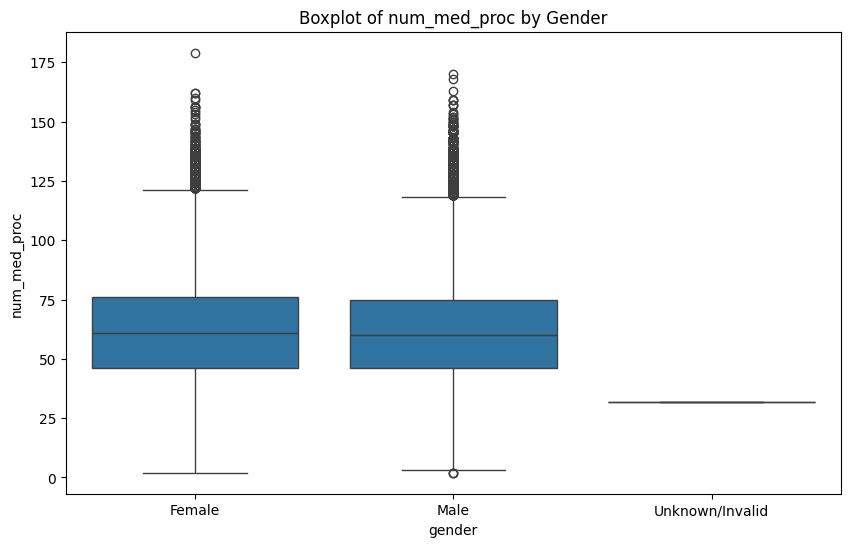

In [17]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the diabetic_data dataset
diabetic_data = pd.read_csv('diabetic_data.csv')

# 2. Handle missing values, if any
diabetic_data.dropna(subset=['num_med_proc', 'gender'], inplace=True)

# 3. Check for normality in each gender category
def check_normality(group):
    k2, p = stats.normaltest(group)
    alpha = 0.05
    if p < alpha:
        return False
    else:
        return True

male_data = diabetic_data[diabetic_data['gender'] == 'Male']['num_med_proc']
female_data = diabetic_data[diabetic_data['gender'] == 'Female']['num_med_proc']

is_male_normal = check_normality(male_data)
is_female_normal = check_normality(female_data)

print("Is male data normally distributed?", is_male_normal)
print("Is female data normally distributed?", is_female_normal)

# 4. Calculate total data points and perform tests
n_male = len(male_data)
n_female = len(female_data)

if n_male < 30 and is_male_normal:
    t_stat, p_value = stats.ttest_ind(male_data, female_data)
    print("T-Test result for males: t =", t_stat, "p =", p_value)
elif n_male > 30 and not is_male_normal:
    u_stat, p_value = stats.mannwhitneyu(male_data, female_data)
    print("Mann-Whitney U Test result for males: U =", u_stat, "p =", p_value)
    # Trying regular t-test even if n > 30 and data is not normal
    t_stat, p_value = stats.ttest_ind(male_data, female_data)
    print("Regular T-Test result for males (with non-normal data): t =", t_stat, "p =", p_value)

if n_female < 30 and is_female_normal:
    t_stat, p_value = stats.ttest_ind(female_data, male_data)
    print("T-Test result for females: t =", t_stat, "p =", p_value)
elif n_female > 30 and not is_female_normal:
    u_stat, p_value = stats.mannwhitneyu(female_data, male_data)
    print("Mann-Whitney U Test result for females: U =", u_stat, "p =", p_value)
    # Trying regular t-test even if n > 30 and data is not normal
    t_stat, p_value = stats.ttest_ind(female_data, male_data)
    print("Regular T-Test result for females (with non-normal data): t =", t_stat, "p =", p_value)

# 5. Perform ANOVA or Kurskal-Wallis based on conditions
if n_male + n_female <= 30 and is_male_normal and is_female_normal:
    f_val, p_val = stats.f_oneway(male_data, female_data)
    print("ANOVA result: F =", f_val, "p =", p_val)
else:
    H, p_val = stats.kruskal(male_data, female_data)
    print("Kruskal-Wallis result: H =", H, "p =", p_val)

# 6. Visualize the data using appropriate plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='num_med_proc', data=diabetic_data)
plt.title("Boxplot of num_med_proc by Gender")
plt.show()


AIM 3: Perform Chi-square test

1. Use the same diabetic_data
2. Try to find which two variables can be used for the Chi-Square, and then perform the said test
    2.1. After doing the test, calculate the 'expected frequency'
    2.2. Count the total number of 'expected frequency'
    2.3. Count the number of 'expected frequency' where the value is less than 5
    2.3. Get the percentage of 'expected frequency' taht is less than 5 comapred to the total number of 'expected frequency'
    2.4. If it is more than 20%, then try the test on different sets of categorical variables
3. Interpret the results of the test.


In [18]:
import pandas as pd
from scipy.stats import chi2_contingency

diabetic_data = pd.read_csv('diabetic_data.csv')

# Step 1: Select the relevant columns
selected_columns = ['gender', 'number_diagnoses']
data_for_test = diabetic_data[selected_columns]

# Step 2: Create a contingency table
contingency_table = pd.crosstab(data_for_test['gender'], data_for_test['number_diagnoses'])

# Step 3: Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 4: Calculate the expected frequency
total_expected = expected.sum().sum()

# Step 5: Count the number of expected frequencies less than 5
count_less_than_5 = (expected < 5).sum().sum()

# Step 6: Calculate the percentage of expected frequencies less than 5
percentage_less_than_5 = (count_less_than_5 / total_expected) * 100

# Step 7: Check if the percentage is greater than 20%
if percentage_less_than_5 > 20:
    print("The percentage of expected frequencies less than 5 is greater than 20%.")
    print("Try different sets of categorical variables for the Chi-square test.")
else:
    print("The percentage of expected frequencies less than 5 is not greater than 20%.")
    print("Proceed with the Chi-square test results.")

# Step 8: Interpret the results
alpha = 0.05  # significance level
if p < alpha:
    print("There is a significant association between Gender and Diagnosis (reject H0).")
else:
    print("There is no significant association between Gender and Diagnosis (fail to reject H0).")

The percentage of expected frequencies less than 5 is not greater than 20%.
Proceed with the Chi-square test results.
There is no significant association between Gender and Diagnosis (fail to reject H0).
